In [5]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['figure.figsize']=(20.0,10.0)
# to scale the figure size

In [6]:
data = pd.read_csv('C:/Users/Anmol/Desktop/data science/headbrain.csv')

In [7]:
data.shape

(237, 4)

In [8]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [9]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

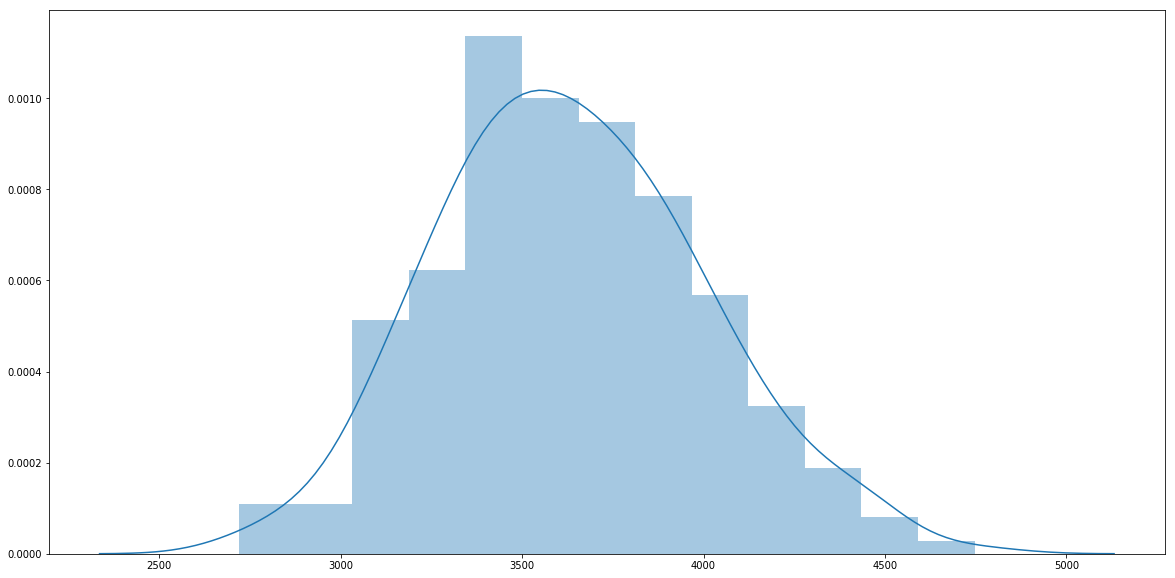

In [11]:
sb.distplot(X)

In [10]:
data['Head Size(cm^3)'].skew()

0.2388065848891712

In [11]:
data['Head Size(cm^3)'].kurt()

-0.1134564707717618

In [12]:
data['Head Size(cm^3)'].describe()

count     237.000000
mean     3633.991561
std       365.261422
min      2720.000000
25%      3389.000000
50%      3614.000000
75%      3876.000000
max      4747.000000
Name: Head Size(cm^3), dtype: float64

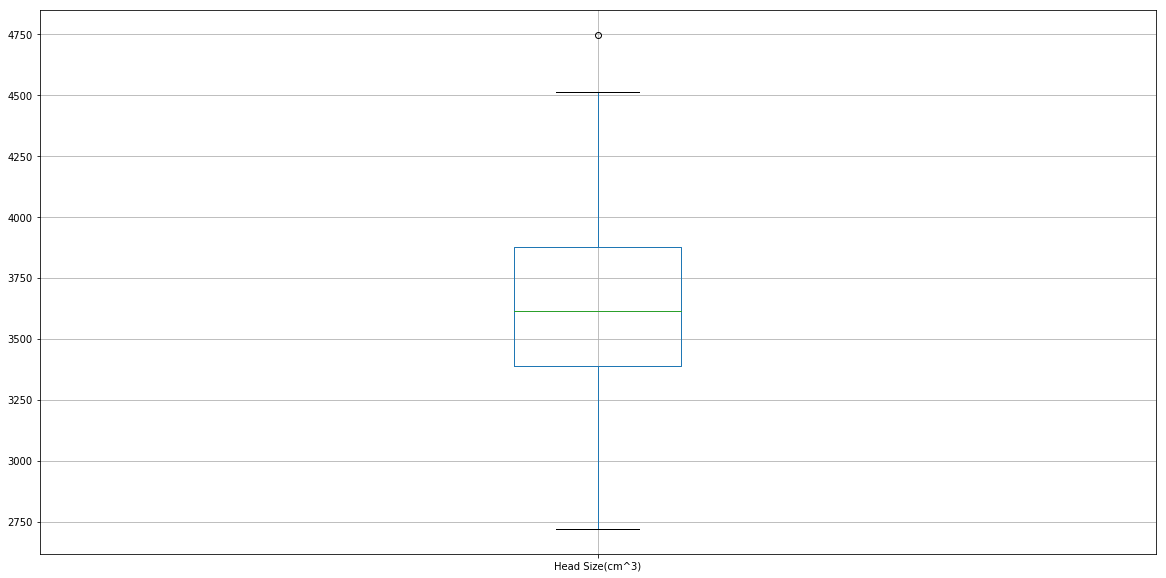

In [13]:
data.boxplot(column='Head Size(cm^3)')

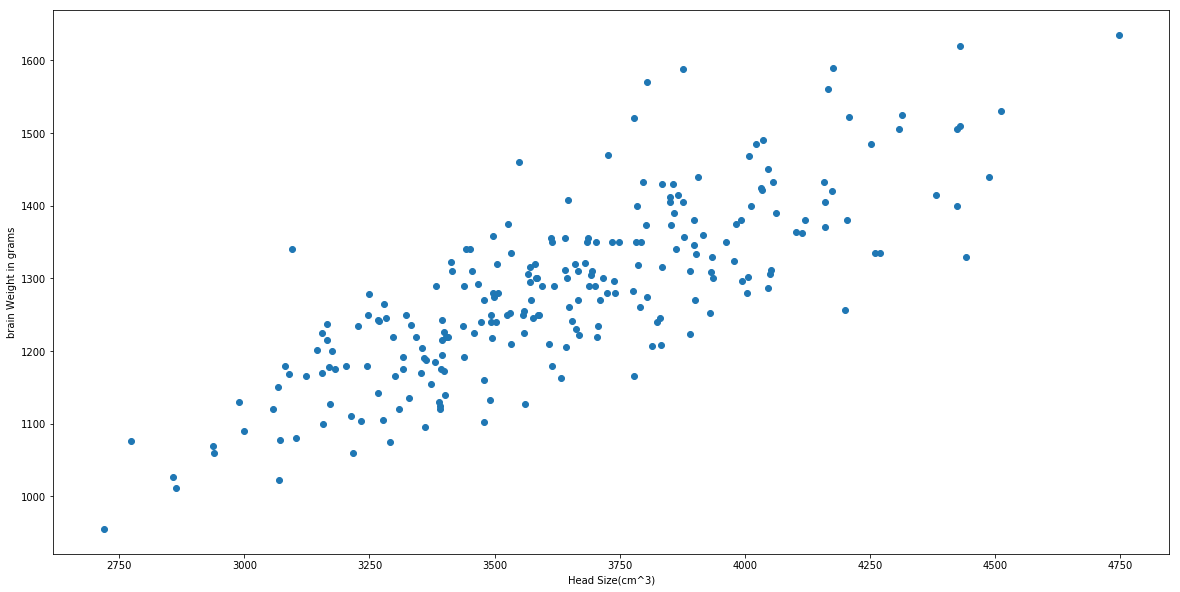

In [14]:
plt.scatter(X,Y)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('brain Weight in grams')
plt.show()

In [15]:
np.corrcoef(X,Y)[0,1]

0.7995697092542962

In [17]:
import scipy.stats as stats
stats.pearsonr(X,Y)


(0.7995697092542964, 5.957630839405754e-54)

In [18]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
m=len(X)
# using formula to calculate b1 and b0
numer = 0
denom = 0
for i in range(m):
    numer +=(X[i] - mean_x)*(Y[i] - mean_y)
    denom +=(X[i] - mean_x)**2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)
# print coefficients
print(b1,b0)

0.26342933948939945 325.57342104944223


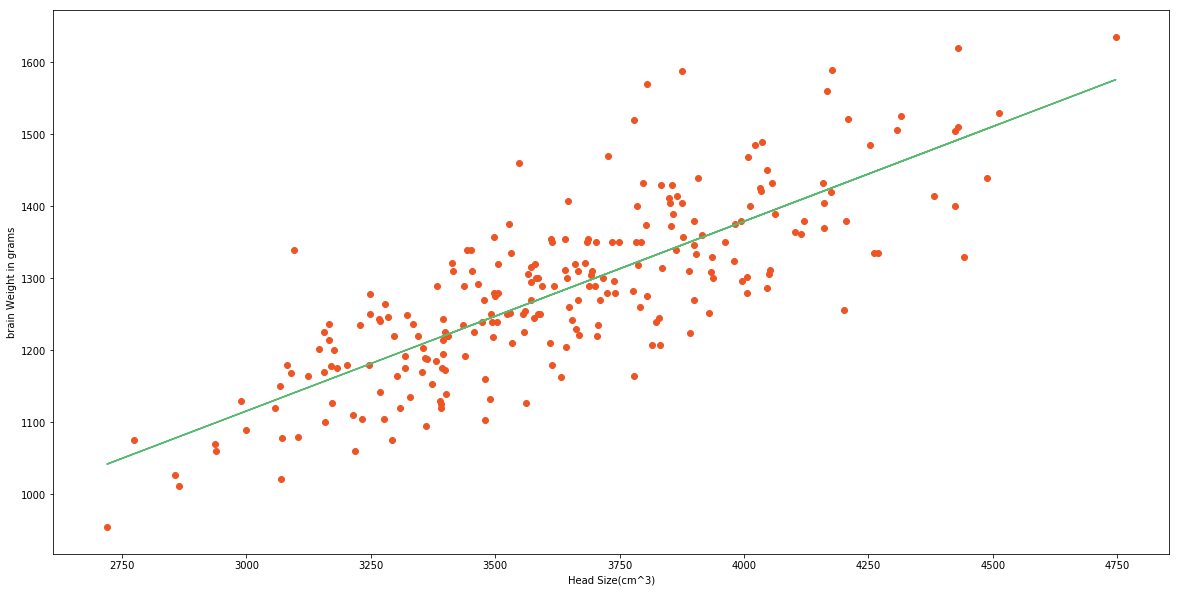

In [22]:
y_pred = b0+b1 *X
plt.plot(X, y_pred,color ='#58b970' , label='regression Line')
plt.scatter(X, Y, c='#ef5423',label = 'Scatter plot')

plt.xlabel('Head Size(cm^3)')
plt.ylabel('brain Weight in grams')
plt.legend()
plt.show()

In [23]:
#calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred)**2
rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213783709


In [26]:
ss_t = 0 #total sum of squre
ss_r = 0 #total sum of square residuals
for i in range(m):
    y_pred = b0 +b1 *X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2= 1-(ss_r/ss_t)
print(r2)

0.6393117199570003
